In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sb
import spacy

In [ ]:
# Load English language pretrained model from spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Load json data
# Note: may need to edit the file paths
with open('/content/drive/MyDrive/11777/TextVQA_0.5.1_val.json') as val, \
    open('/content/drive/MyDrive/11777/TextVQA_0.5.1_train.json') as train, \
    open('/content/drive/MyDrive/11777/TextVQA_0.5.1_test.json') as test:
    val_list = json.load(val)
    train_list = json.load(train)
    test_list = json.load(test)

In [ ]:
# Convert json data to pandas dfs
val_data = pd.json_normalize(val_list, record_path='data')
train_data = pd.json_normalize(train_list, record_path='data')
test_data = pd.json_normalize(test_list, record_path='data')

In [ ]:
# val_data.info()

In [ ]:
# For this analysis, select text-related columns from the _data dfs to create _text dfs
val_text = val_data[['question_id', 'question', 'question_tokens', 'answers', 'set_name']]
train_text = train_data[['question_id', 'question', 'question_tokens', 'answers', 'set_name']]
test_text = test_data[['question_id', 'question', 'question_tokens', 'set_name']]

In [ ]:
# Add a column on question length, and another column that caps question length at 20
for text_df in [val_text, train_text, test_text]:
    text_df['question_len'] = text_df.question_tokens.apply(len)
    text_df['capped_question_len'] = text_df.apply(lambda x: x['question_len'] if x['question_len'] <= 20 else 20, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Add a column on the number of answers for each question
val_text['answer_num'] = val_text.answers.apply(len)
train_text['answer_num'] = train_text.answers.apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# This cell and the next confirm that each question has 10 answers
val_text.describe()

,question_id,question_len,capped_question_len,answer_num
count,5000.000000,5000.000000,5000.000000,5000.0
mean,37101.500000,7.211000,7.207400,10.0
std,1443.520003,2.448852,2.418006,0.0
min,34602.000000,2.000000,2.000000,10.0
25%,35851.750000,6.000000,6.000000,10.0
50%,37101.500000,7.000000,7.000000,10.0
75%,38351.250000,8.000000,8.000000,10.0
max,39601.000000,37.000000,20.000000,10.0


In [ ]:
train_text.describe()

,question_id,question_len,capped_question_len,answer_num
count,34602.000000,34602.000000,34602.000000,34602.0
mean,17300.500000,7.184758,7.183573,10.0
std,9988.881344,2.394865,2.386306,0.0
min,0.000000,2.000000,2.000000,10.0
25%,8650.250000,6.000000,6.000000,10.0
50%,17300.500000,7.000000,7.000000,10.0
75%,25950.750000,8.000000,8.000000,10.0
max,34601.000000,33.000000,20.000000,10.0


In [ ]:
# Convert the question column to a list of docs
val_questions = list(nlp.pipe(val_data.question))
train_questions = list(nlp.pipe(train_data.question))
test_questions = list(nlp.pipe(test_data.question))

In [ ]:
# type(val_questions[0])

In [ ]:
# Convert the answers column to a df with 10 columns, containing answers only
# The expanded_ dfs have only one column that contains all answers
s = 'answering does not require reading'
func = lambda l: ['image not required' if x.startswith(s) else x for x in l]

val_text['answers'] = val_text['answers'].apply(func)
val_10_answers = val_text["answers"].apply(pd.Series)
expanded_val_answers = val_10_answers.melt()

train_text['answers'] = train_text['answers'].apply(func)
train_10_answers = train_text["answers"].apply(pd.Series)
expanded_train_answers = train_10_answers.melt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# This function converts an entire df to a list of docs 
def df_to_docs(df):
    docs = []
    for name, series in df.items():
        docs = docs + list(nlp.pipe(series))
    return docs

In [ ]:
# Convert each answers df to a list of docs
val_answers = df_to_docs(val_10_answers)
train_answers = df_to_docs(train_10_answers)

In [ ]:
# print(len(val_answers))
# print(val_10_answers.shape)

In [ ]:
# This function extracts the token data of interest from a doc
def extract_tokens_plus_meta(doc):
    return [
        (i.text, i.i, i.pos_) for i in doc
    ]

In [ ]:
# This function uses a list of docs to tabulate token data info of interest to a df
def tab_token_data(docs):
    """Extract tokens and metadata from list of spaCy docs."""
    
    cols = [
        "doc_id", "token", "token_order", "pos"
    ]
    
    meta_df = []
    for ix, doc in enumerate(docs):
        meta = extract_tokens_plus_meta(doc)
        meta = pd.DataFrame(meta)
        meta.columns = cols[1:]
        meta = meta.assign(doc_id = ix).loc[:, cols]
        meta_df.append(meta)
        
    return pd.concat(meta_df)  

In [ ]:
# Create dfs that contain question/ answer token data of interest
val_q_token_data = tab_token_data(val_questions)
train_q_token_data = tab_token_data(train_questions)
test_q_token_data = tab_token_data(test_questions)
val_a_token_data = tab_token_data(val_answers)
train_a_token_data = tab_token_data(train_answers)

In [ ]:
# val_q_token_data.query("pos != 'PUNCT'").pos.value_counts()

In [ ]:
# For each dataset, analyze questions and create graphs and metrics files
# Specifically, question length, the most frequent questions, question starting word, and the most frequent word classes in questions

# def analyze_questions(text_df, token_data, prefix, path):
    
#     avg_question_len = text_df['question_len'].mean()
#     median_question_len = text_df['question_len'].median()
#     std_dev_question_len = text_df['question_len'].std()
#     with open(path + prefix + 'question_metrics.txt', 'w') as metrics_file:
#         tsv_writer = csv.writer(metrics_file, delimiter='\t')
#         tsv_writer.writerow(['avg question length: ' + "%.2f" % avg_question_len])
#         tsv_writer.writerow(['median question length: ' + "%.2f" % median_question_len])
#         tsv_writer.writerow(['std dev of question length: ' + "%.2f" % std_dev_question_len])
    
#     plt.clf()
#     text_df.capped_question_len.hist(figsize=(14, 7), range=(0, 20), color="red", alpha=.4, bins=20)
#     plt.savefig(path + prefix + 'question_length.png')

#     plt.clf()
#     text_df.question.value_counts().head(10).plot(kind="barh", figsize=(30, 14), color='green', alpha=.7)
#     plt.yticks(fontsize=15)
#     plt.xticks(fontsize=15)
#     plt.savefig(path + prefix + '10_most_frequent_questions.png')
    
#     plt.clf()
#     first_word = token_data[token_data['token_order'] == 0].token.value_counts()
#     first_word = first_word / first_word.sum()
#     ax = first_word.head(10).plot(kind="barh", figsize=(24, 14), alpha=.7)
#     ax.invert_yaxis()
#     plt.savefig(path + prefix + 'distribution_of_10_most_frequent_question_starting_words.png')
    
#     plt.clf()
#     word_token = token_data.query("pos != 'PUNCT'").pos.value_counts()
#     word_token = word_token / word_token.sum()
#     ax = word_token.head(10).plot(kind="barh", figsize=(24, 14), color='orange', alpha=.7)
#     ax.invert_yaxis()
#     plt.savefig(path + prefix + 'distribution_of_10_most_frequent_word_classes_in_questions.png')
    
    
# # Note: may need to edit the file path
# path = '/content/drive/MyDrive/11777/'
# analyze_questions(val_text, val_q_token_data, 'val_', path)
# analyze_questions(train_text, train_q_token_data, 'train_', path)
# analyze_questions(test_text, test_q_token_data, 'test_', path)

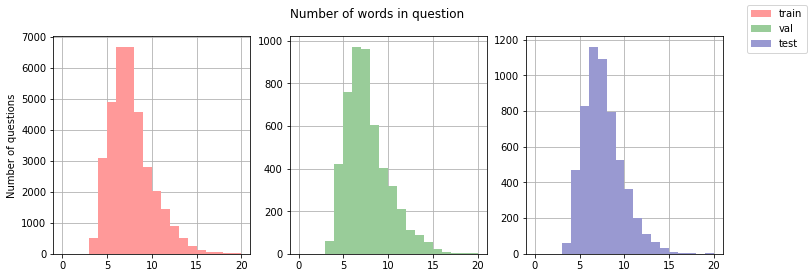

In [32]:
splits = [train_text, val_text, test_text]
labels = ['train', 'val', 'test']
colors = ['#ff9999', '#99cc99', '#9999d1']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for text_df, ax, label, color in zip(splits, axes, labels, colors):
  text_df.question_len.hist(ax=ax, range=(0, 20), color=color, label=label, bins=20, zorder=3)
  if label == 'train':
    ax.set_ylabel('Number of questions')
fig.legend()
fig.suptitle('Number of words in question')
plt.savefig('/content/drive/MyDrive/11777/qlength.pdf', bbox_inches='tight')

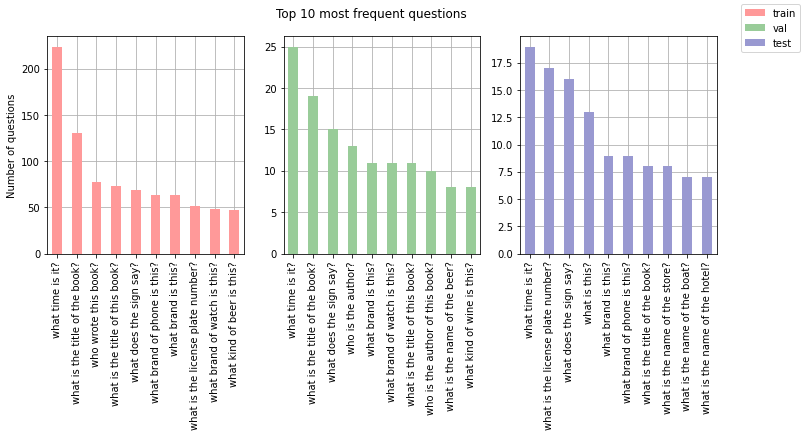

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for text_df, ax, label, color in zip(splits, axes, labels, colors):
  text_df.question.value_counts().head(10).plot(ax=ax, kind="bar", label=label, color=color, zorder=3)
  ax.grid(zorder=0)
  if label == 'train':
    ax.set_ylabel('Number of questions')
fig.legend()
fig.suptitle('Top 10 most frequent questions')
plt.savefig('/content/drive/MyDrive/11777/top10q.pdf', bbox_inches='tight')

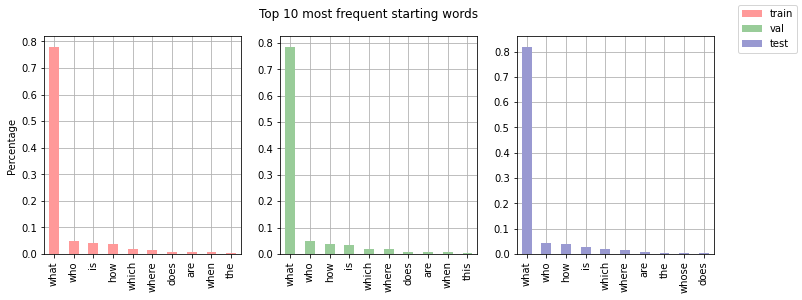

In [34]:
toke_data = [train_q_token_data, val_q_token_data, test_q_token_data]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for token_data, ax, label, color in zip(toke_data, axes, labels, colors):
  first_word = token_data[token_data['token_order'] == 0].token.value_counts()
  first_word = first_word / first_word.sum()
  first_word.head(10).plot(ax=ax, kind="bar", label=label, color=color, zorder=3)
  ax.grid(zorder=0)
  if label == 'train':
    ax.set_ylabel('Percentage')
fig.legend()
fig.suptitle('Top 10 most frequent starting words')
plt.savefig('/content/drive/MyDrive/11777/top10start.pdf', bbox_inches='tight')

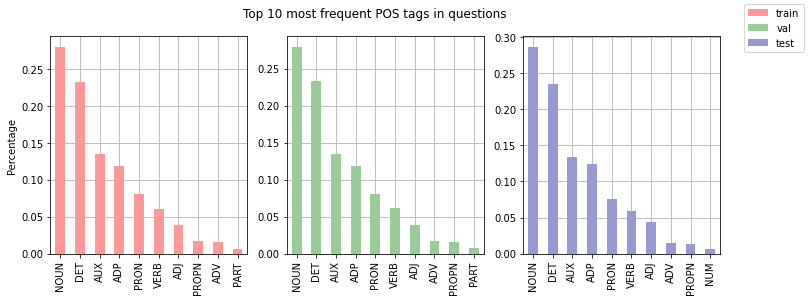

In [35]:
toke_data = [train_q_token_data, val_q_token_data, test_q_token_data]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for token_data, ax, label, color in zip(toke_data, axes, labels, colors):
  word_token = token_data.query("pos != 'PUNCT'").pos.value_counts()
  word_token = word_token / word_token.sum()
  word_token.head(10).plot(ax=ax, kind="bar", label=label, color=color, zorder=3)
  ax.grid(zorder=0)
  if label == 'train':
    ax.set_ylabel('Percentage')
fig.legend()
fig.suptitle('Top 10 most frequent POS tags in questions')
plt.savefig('/content/drive/MyDrive/11777/top10qpos.pdf', bbox_inches='tight')

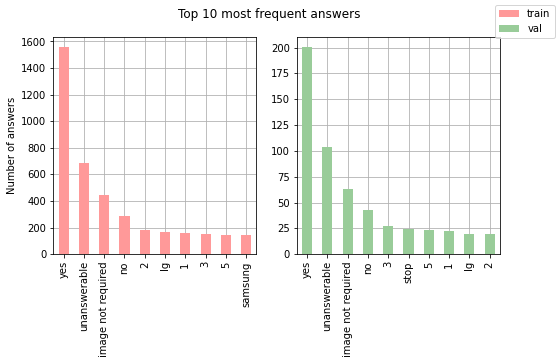

In [36]:
answer_splits = [expanded_train_answers, expanded_val_answers]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
for expanded_answers, ax, label, color in zip(answer_splits, axes, labels[:2], colors[:2]):
  counts = expanded_answers.value.value_counts()
  counts = counts / 10
  counts.head(10).plot(ax=ax, kind="bar", label=label, color=color, zorder=3)
  ax.grid(zorder=0)
  if label == 'train':
    ax.set_ylabel('Number of answers')
fig.legend()
fig.suptitle('Top 10 most frequent answers')
plt.savefig('/content/drive/MyDrive/11777/top10a.pdf', bbox_inches='tight')

In [37]:
# # For each dataset, analyze answers and create graphs and metrics files
# # Specifically, answer length, the most frequent answers, and the most frequent word classes in answers

# def analyze_answers(expanded_answers, text_df, token_data, prefix, path):
    
#     avg_answer_len = token_data.groupby('doc_id').size().mean()
#     median_answer_len = token_data.groupby('doc_id').size().median()
#     std_dev_answer_len = token_data.groupby('doc_id').size().std()
#     with open(path + prefix + 'answer_metrics.txt', 'w') as metrics_file:
#         tsv_writer = csv.writer(metrics_file, delimiter='\t')
#         tsv_writer.writerow(['avg answer length: ' + "%.2f" % avg_answer_len])
#         tsv_writer.writerow(['median answer length: ' + "%.2f" % median_answer_len])
#         tsv_writer.writerow(['std dev of answer length: ' + "%.2f" % std_dev_answer_len])

#     plt.clf()
#     counts = expanded_val_answers.value.value_counts()
#     counts = counts / 10
#     counts.head(10).plot(kind="barh", figsize=(32, 14), color='green', alpha=.7)
#     plt.yticks(fontsize=10)
#     plt.xticks(fontsize=10)
#     plt.savefig(path + prefix + '10_most_frequent_answers.png')
    
#     plt.clf()
#     word_token = token_data.query("pos != 'PUNCT'").pos.value_counts()
#     word_token = word_token / word_token.sum()
#     ax = word_token.head(10).plot(kind="barh", figsize=(24, 14), color='orange', alpha=.7)
#     ax.invert_yaxis()
#     plt.savefig(path + prefix + 'distribution_of_10_most_frequent_word_classes_in_answers.png')
    
    
# # Note: may need to edit the file path
# path = '/content/drive/MyDrive/11777/'
# analyze_answers(expanded_val_answers, val_text, val_a_token_data, 'val_', path)
# analyze_answers(expanded_train_answers, train_text, train_a_token_data, 'train_', path)

In [38]:
# spacy.explain('PART')